<h1 align="center">INF280 - Laboratorio de Estadística Computacional</h1>
<center>
<img src="https://activewizards.com/assets/components/phpthumbof/cache/main-image-python-site1422.5f5b0ce8fcd426270dff2a32a4bf5946.png" width="60%"></img>
<h2 align="center">LEC 2: Frecuentistas vs Bayesianos</h2>

<i> Notebook creado por Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - Diciembre 2019.</i>
</center>



# Objetivo

Aprender a utilizar herramientas y técnicas básicas de la estimación paramétrica y bayesiana, para la estudio de diversos fenómenos aleatorios.

## Instrucciones

* Los informes deben ser desarrollados en parejas definidas al comienzo del semestre. Cualquier cambio debe ser informado previamente al ayudante para su autorización.
* El informe consiste en el desarrollo de este notebook. Completando código donde sea indicado y respondiendo las preguntas planteadas.
* Debe argumentar sus respuestas basándose en los resultados obtenidos en sus experimentos. De no ser así, no podrán optar al puntaje máximo de la pregunta.
* Los gráficos deben ser legibles y fáciles de entender. Esto es utilizar el gráfico adecuado al problema; usar escalas correctas; incluir títulos, nombres de ejes y leyenda.
* El código debe ser legible, comente de manera adecuada y evite la modularización (_simple is better than complex - [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3)_)
* Cualquier consulta o queja debe realizarse a través de la plataforma Moodle.
* La fecha de entrega es el **Domingo 27 de Octubre a las 23:55**.
* El formato de entrega es **GrupoXX_LECN.ipynb**, donde _XX_ es grupo asignado y _N_ el LEC correspondiente. (i.e Grupo03_LEC1.ipynb) 
* Por cada día de atraso se descuentan 10 puntos de la nota máxima a alcanzar.
* Los trabajos que sean resultado de copia o plagio de otros trabajos, serán automáticamente evaluados con nota 0.

## Aprendizaje Esperado

Los y las estudiantes deben ser capaces de:

* Utilizar las herramientas básicas de generación de números aleatorios. (Python o R-Project).

* Ser capaces de identificar problemas que pueden ser solucionados a través de métodos de probabilisticos como simulación y el teorema de bayes.

* Ser capaces de realizar un análisis comparativos entre gráficos y resultados obteniendo conclusiones que se infieren de este mismo análisis.

## Actividad

Lea las siguientes preguntas y responda de manera clara y precisa. Algunas de estas requieren de completar o implementar funciones, no edite funciones si no se les indica. 

El puntaje máximo es de 100, cada pregunta indica su puntaje asignado.

### Información del Grupo





| Rol| Nombre | Correo |
| ---------- | ---------- | ---------- |
| COMPLETAR  | COMPLETAR   | COMPLETAR |
| COMPLETAR   | COMPLETAR  | COMPLETAR |


## How to make $\pi$

<center>
<img src="https://images.fineartamerica.com/images-medium-large-5/2-pi-symbol-and-number-alfred-pasieka.jpg" width="40%"></img>


</center>

Los métodos de [Monte Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo) son una amplia clase de algoritmos que dependen del muestreo aleatorio repetido para obtener resultados numéricos. Uno de los ejemplos básicos para comenzar con el algoritmo de Monte Carlo es la estimación de $\pi$.

Para estimar el valor de $\pi$, vamos a tomar muestras de una distribución uniforme de puntos en un cuadrado de lados $2r$, circunscrito a una circunferenca. 

Notar que el valor de $\pi$ puede ser expresado como la razón entre las áreas:

$$A_{cuadrado} = \pi r^2$$
$$A_{circulo} =  4 r^2$$
$$\pi = 4 \frac{A_{circulo}}{A_{cuadrado}}$$

Podemos estimar esta razón con nuestras muestras. Sea $m$ la cantidad de muestras que están contenidas en nuestra circunferencia, y $n$ el total de la cantidad de muestras. Definimos nuestro estimador $\hat{\pi}$ como:

$$\hat{\pi} =  4 \frac{m}{n}$$

### El algoritmo

De esta forma, podemos estimar el valor de $\pi$ para un $r=1$ y un valor dado de puntos $n$ (pares x,y), al usar el siguiente algoritmo. 

1. Inicializar *m* igual a 0.
2. Generar $n$ valores x aleatorios entre $[-1,1]$ provinientes de una distribución uniforme.
3. Generar $n$ valores y aleatorios entre $[-1,1]$ provinientes de una distribución uniforme.
4. Calcular d = sqrt(x*x + y*y).
5. Contar la cantidad de valores que cumplan $d <= 1$, asignarlos a *m*.
6. Calcular pi = 4*(m/n).
7. Retornar pi.

En las siguientes secciones implementaremos este algoritmo y obtendremos una aproximación del valor de $\pi$. Para esto complete las funciones y responda las siguientes preguntas:


In [0]:
# Vectores y Random Samples
from numpy.linalg import norm
from numpy import vstack, sum
from numpy.random import random as uniform

# Graficos
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import seaborn as sns; sns.set()

# Interactividad
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Distancia al origen
distances = lambda samples: norm(samples, axis=1)

# Valor de Pi
from numpy import pi as real_pi


* (<font color='red'>5 Puntos</font>) Los pasos *2* y *3* requieren de una muestra aleatoria de un distribución uniforme, complete la función `` sample``.

In [0]:
def sample(n):
    """
    sample genera una muestra uniforme de puntos en un intervalo [-1,1]
      arg
        n: cantidad de puntos.
      return
        points: vector con dimensiones (n, 2)
    """
    x = 2 * uniform(n) - 1
    y = 2 * uniform(n) - 1

    points = vstack((x, y)).T

    return points

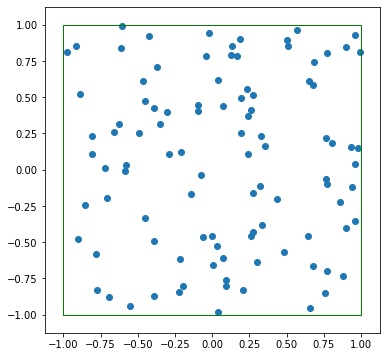

In [0]:
n = 100
s = sample(n)

plt.figure(figsize=(6,6))
plt.scatter(x=s[:,0], y=s[:,1])
plt.ylim((-1.125, 1.125))
plt.xlim((-1.125, 1.125))

rect = Rectangle((-1,-1),2,2,linewidth=1,edgecolor='g',facecolor='none')

# Add the patch to the Axes
ax = plt.gca()
ax.add_patch(rect)

plt.show()

In [0]:
def in_circumference(points):
    """
    in_circumference evalua la distancia al origen de cada punto, y los clasifica
    como dentro o fuera de la circunferencia.
      arg
        points: vector con los puntos  con dimensiones (n, 2).
      return
        mask: vector booleano con dimensiones (n,) con True o False si el punto 
              pertenece a la circunferencia.
        m: Cantidad de puntos dentro de la circunferencia.
    """
    d = distances(points)
    mask = d <= 1
    m = sum(mask)
    return mask, m

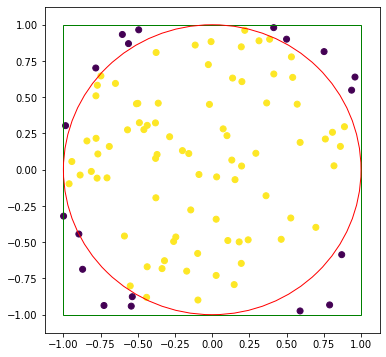

In [0]:
n = 100
s = sample(n)
mask, m = in_circumference(s)

plt.figure(figsize=(6,6))
plt.scatter(x=s[:,0], y=s[:,1], c=mask)
plt.ylim((-1.125, 1.125))
plt.xlim((-1.125, 1.125))

rect = Rectangle((-1,-1),2,2,linewidth=1,edgecolor='g',facecolor='none')
circ = Circle((0, 0), 1, color='r', fill=False)

ax = plt.gca()
ax.add_patch(rect)
ax.add_patch(circ)

plt.show()

In [0]:
def pi_estimator(n, return_points=False):
    """
    pi_estimator estima el valor de pi para una muestra de tamaño n
      args:
        n: Tamaño de la muestra
        return_points: si es True, retorna los puntos generados.
      return
        pi: Valor estimado de pi
        points:  Vector con los puntos  con dimensiones (n, 2).
    """
    
    m = 0
    points = sample(n)
    mask, m = in_circumference(points)
    pi = 4*m/n
    
    if return_points:
        return pi, points
    else:
        return pi

In [0]:
@interact(n=widgets.FloatLogSlider(
    value=1,
    base=10,
    min=1,
    max=6,
    step=1,
    readout_format='.0f',
))
def show_estimator(n):
    n = int(n)
    pi, s = pi_estimator(n, True)
    mask, m = in_circumference(s)

    plt.figure(figsize=(6,6))
    plt.scatter(x=s[:,0], y=s[:,1], c=mask)
    plt.ylim((-1.125, 1.125))
    plt.xlim((-1.125, 1.125))

    rect = Rectangle((-1,-1),2,2,linewidth=1,edgecolor='g',facecolor='none')
    circ = Circle((0, 0), 1, color='r', fill=False)

    ax = plt.gca()
    ax.add_patch(rect)
    ax.add_patch(circ)

    plt.title("$\hat{\pi}$ = " + str(pi))

    plt.show()

interactive(children=(FloatLogSlider(value=10.0, description='n', max=6.0, min=1.0, readout_format='.0f', step…

### La importancia del valor $n$

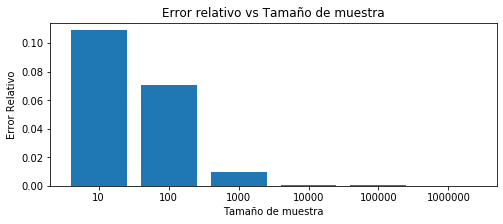

In [0]:
n_values = [10, 100, 1000, 10000, 100000, 1000000]
n_values_names = map(str, n_values)
n_values_index = list(range(len(n_values)))

relative_errors = []
for n in n_values:
    pi = pi_estimator(n)
    relative_errors.append(abs(real_pi - pi)/real_pi)


plt.figure(figsize=(8,3))
plt.title("Error relativo vs Tamaño de muestra")
plt.bar(n_values_index, relative_errors)
plt.xticks(n_values_index, n_values_names)
plt.ylabel("Error Relativo")
plt.xlabel("Tamaño de muestra")
plt.show()

##  The Dices Problem

In [0]:
def show_distribution(distribution, thetas):
    x_values_index =list(range(len(thetas)))
    x_values_names = list(map(str, thetas))
    plt.figure(figsize=(8,3))
    plt.title("Distribución $\\theta$")
    plt.bar(x_values_index, distribution)
    plt.ylim((0,1))
    plt.xticks(x_values_index, x_values_names)
    plt.ylabel("$P(\\theta)$")
    plt.xlabel("$\\theta$")
    plt.show()

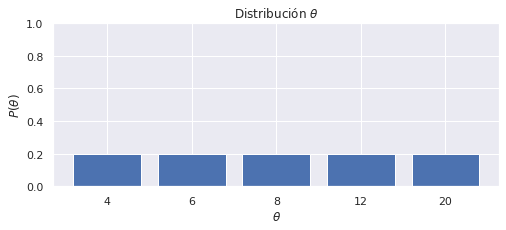

In [0]:
thetas = [4, 6, 8, 12, 20]
prior_distribution = [ 1./len(thetas) for _ in thetas]
show_distribution(prior_distribution, thetas)

In [0]:
def P_theta(x, theta):
    if x > theta:
        return 0.
    else:
        return 1./theta

def likelihood(theta, X):
    _likelihood = 1
    for xi in X:
        _likelihood *= P_theta(xi, theta)
    return _likelihood

In [0]:
def normalization_const(prior_likelihood):
    return sum(prior_likelihood)

def update(prior_distribution, thetas, X):
    norm_const = 0
    prior_likelihood = []
    posterior_distribution = []
    for theta, prior in zip(thetas, prior_distribution):
        _likelihood = likelihood(theta, X)
        norm_const += _likelihood
        prior_likelihood.append(prior*_likelihood)
    norm_const = normalization_const(prior_likelihood)
    posterior_distribution = [p/norm_const for p in prior_likelihood]
    return posterior_distribution

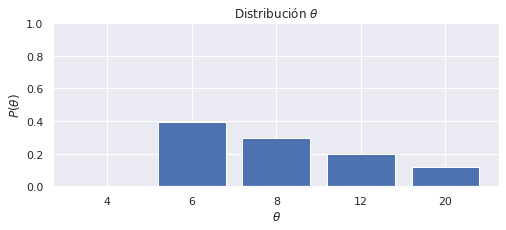

In [0]:
show_distribution(update(prior_distribution, thetas, [6]), thetas)

In [0]:
def show_updates(prior, thetas, data, i=0):
    X = data[:i]
    print("Data:", X)
    posterior_distribution = update(prior, thetas, X)
    show_distribution(posterior_distribution, thetas)

data = [2, 6, 8, 7, 5, 3, 11, 7, 9]
interactive(show_updates, prior=fixed(prior_distribution), thetas=fixed(thetas), data=fixed(data), i=(0, len(data), 1))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

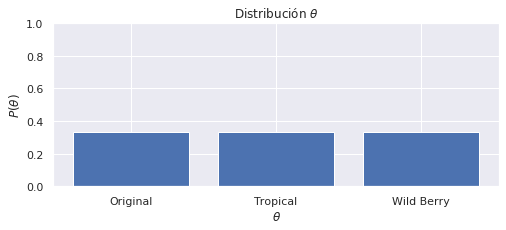

In [0]:
thetas = ["Original", "Tropical", "Wild Berry"]
prior_distribution = [ 1./len(thetas) for _ in thetas]
show_distribution(prior_distribution, thetas)

<center>
<img src="https://www.candyindustry.com/ext/resources/eNews/2019/skittles_900x550.jpeg?1573060427" width="80%"></img>




In [0]:
def P_theta(x, theta):
    P = {
        "Original": {
            "morado": 0.15,
            "amarillo": 0.12,
            "verde": 0.24,
            "naranja": 0.18,
            "rojo": 0.26,
            "azul": 0.05,
            "rosa": 0.,
            "violeta": 0.
        }, 
        "Tropical": {
            "morado": 0.,
            "amarillo": 0.15,
            "verde": 0.30,
            "naranja": 0.23,
            "rojo": 0.01,
            "azul": 0.10 ,
            "rosa": 0.21,
            "violeta": 0.
        },
        "Wild Berry": {
            "morado": 0.,
            "amarillo": 0.,
            "verde": 0.12,
            "naranja": 0.,
            "rojo": 0.30,
            "azul": 0.25,
            "rosa": 0.16,
            "violeta": 0.17
        }
    }

    return P[theta][x]

In [0]:
data = ["azul", "verde", "verde", "rojo", "amarillo", "verde", "amarillo", "azul", "naranja", "naranja", "azul", "verde"]
interactive(show_updates, prior=fixed(prior_distribution), thetas=fixed(thetas), data=fixed(data), i=(0, len(data), 1))

interactive(children=(IntSlider(value=0, description='i', max=12), Output()), _dom_classes=('widget-interact',…

In [0]:
# COMPLETAR ...
total = ...
print(f"Hay {total} Pokemons")

print("Primeros 5")
display(...)

print("Últimos 5")
display(...)

* (<font color='red'>8 Puntos</font>) ¿Cuántas y cuáles son la columnas del dataset y qué tipo de dato son `(dtype)`?    Luego, por cada columna exceptuando _name_ y _pokedex_number_, indique su escala de medición (Nominal, Ordinal, Intervalos, Razón).




In [0]:
# COMPLETAR
display(...)

**Escalas de Medición**



<font color="greed"> COMPLETAR </font> 
1. __type1__: ...
2. __type2__: ...
3. __classfication__: ...
4. ...


Felicidades! han completado el segundo Laboratorio de Estadística Computacional (LEC)

Recuerden contestar todas las preguntas y llenar la tabla con la información de su grupo.